In [1]:
import numpy as np
import pandas as pd
import ast 
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pickle

In [2]:
movies = pd.read_csv('tmdb_5000_movies.csv')
credits = pd.read_csv('tmdb_5000_credits.csv')

In [3]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [4]:
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [5]:
# merge the two datsets into one

In [6]:
movies = movies.merge(credits,on='title')

In [7]:
movies.shape

(4809, 23)

In [8]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4809 entries, 0 to 4808
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4809 non-null   int64  
 1   genres                4809 non-null   object 
 2   homepage              1713 non-null   object 
 3   id                    4809 non-null   int64  
 4   keywords              4809 non-null   object 
 5   original_language     4809 non-null   object 
 6   original_title        4809 non-null   object 
 7   overview              4806 non-null   object 
 8   popularity            4809 non-null   float64
 9   production_companies  4809 non-null   object 
 10  production_countries  4809 non-null   object 
 11  release_date          4808 non-null   object 
 12  revenue               4809 non-null   int64  
 13  runtime               4807 non-null   float64
 14  spoken_languages      4809 non-null   object 
 15  status               

In [9]:
# features that are necessary for recommendation:
# genres, id, keywords, original_title, overview, cast, crew

In [10]:
movies = movies[['movie_id','title','overview','genres','keywords','cast','crew']]

In [11]:
movies.head(1)

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [12]:
# making a new dataframe consisting of movie_id, title, tags
# tags = overview + genres + keywords + cast

In [13]:
movies.isnull().sum()

movie_id    0
title       0
overview    3
genres      0
keywords    0
cast        0
crew        0
dtype: int64

In [14]:
movies.dropna(inplace=True)

In [15]:
movies.isnull().sum()

movie_id    0
title       0
overview    0
genres      0
keywords    0
cast        0
crew        0
dtype: int64

In [16]:
movies.duplicated().sum()

0

In [17]:
# preprocessingn the columns:

In [18]:
movies.iloc[0].genres

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [19]:
ast.literal_eval('[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]')

[{'id': 28, 'name': 'Action'},
 {'id': 12, 'name': 'Adventure'},
 {'id': 14, 'name': 'Fantasy'},
 {'id': 878, 'name': 'Science Fiction'}]

In [20]:
def preprocess(obj):
    L=[]
    for i in ast.literal_eval(obj):
        L.append(i['name'])
    return L

In [21]:
movies['genres'] = movies['genres'].apply(preprocess)

In [22]:
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [23]:
movies['keywords']

0       [{"id": 1463, "name": "culture clash"}, {"id":...
1       [{"id": 270, "name": "ocean"}, {"id": 726, "na...
2       [{"id": 470, "name": "spy"}, {"id": 818, "name...
3       [{"id": 849, "name": "dc comics"}, {"id": 853,...
4       [{"id": 818, "name": "based on novel"}, {"id":...
                              ...                        
4804    [{"id": 5616, "name": "united states\u2013mexi...
4805                                                   []
4806    [{"id": 248, "name": "date"}, {"id": 699, "nam...
4807                                                   []
4808    [{"id": 1523, "name": "obsession"}, {"id": 224...
Name: keywords, Length: 4806, dtype: object

In [24]:
movies['keywords'] = movies['keywords'].apply(preprocess)

In [25]:
def preprocess_upto3(obj):
    L=[]
    c=0
    for i in ast.literal_eval(obj):
        if c != 3:
            L.append(i['name'])
            c+=1
        else:
            break
    return L

movies['cast'] = movies['cast'].apply(preprocess_upto3)

In [26]:
movies.head(1)

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [27]:
# now from crew we only want the job = director part

In [28]:
movies['crew'][0]

'[{"credit_id": "52fe48009251416c750aca23", "department": "Editing", "gender": 0, "id": 1721, "job": "Editor", "name": "Stephen E. Rivkin"}, {"credit_id": "539c47ecc3a36810e3001f87", "department": "Art", "gender": 2, "id": 496, "job": "Production Design", "name": "Rick Carter"}, {"credit_id": "54491c89c3a3680fb4001cf7", "department": "Sound", "gender": 0, "id": 900, "job": "Sound Designer", "name": "Christopher Boyes"}, {"credit_id": "54491cb70e0a267480001bd0", "department": "Sound", "gender": 0, "id": 900, "job": "Supervising Sound Editor", "name": "Christopher Boyes"}, {"credit_id": "539c4a4cc3a36810c9002101", "department": "Production", "gender": 1, "id": 1262, "job": "Casting", "name": "Mali Finn"}, {"credit_id": "5544ee3b925141499f0008fc", "department": "Sound", "gender": 2, "id": 1729, "job": "Original Music Composer", "name": "James Horner"}, {"credit_id": "52fe48009251416c750ac9c3", "department": "Directing", "gender": 2, "id": 2710, "job": "Director", "name": "James Cameron"},

In [29]:
def director_increw(obj):
    L=[]
    for i in ast.literal_eval(obj):
        if i['job'] == 'Director':
            L.append(i['name'])
    return L

In [30]:
movies['crew'] = movies['crew'].apply(director_increw)

In [31]:
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron]
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley]",[Gore Verbinski]
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux]",[Sam Mendes]
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine, Gary Oldman]",[Christopher Nolan]
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins, Samantha Morton]",[Andrew Stanton]


In [32]:
# overview is a string. converting it into a list

In [33]:
movies['overview'].apply(lambda x:x.split())

0       [In, the, 22nd, century,, a, paraplegic, Marin...
1       [Captain, Barbossa,, long, believed, to, be, d...
2       [A, cryptic, message, from, Bond’s, past, send...
3       [Following, the, death, of, District, Attorney...
4       [John, Carter, is, a, war-weary,, former, mili...
                              ...                        
4804    [El, Mariachi, just, wants, to, play, his, gui...
4805    [A, newlywed, couple's, honeymoon, is, upended...
4806    ["Signed,, Sealed,, Delivered", introduces, a,...
4807    [When, ambitious, New, York, attorney, Sam, is...
4808    [Ever, since, the, second, grade, when, he, fi...
Name: overview, Length: 4806, dtype: object

In [34]:
movies['overview'] = movies['overview'].apply(lambda x:x.split())

In [35]:
# now we need to remove spaces between spaces. as two actors may have same name but different titles. so to avoid confusion. we will do the same for all the features as same problem may originate for them

In [36]:
movies['genres'].apply(lambda x:[i.replace(" ","") for i in x])

0       [Action, Adventure, Fantasy, ScienceFiction]
1                       [Adventure, Fantasy, Action]
2                         [Action, Adventure, Crime]
3                   [Action, Crime, Drama, Thriller]
4                [Action, Adventure, ScienceFiction]
                            ...                     
4804                       [Action, Crime, Thriller]
4805                               [Comedy, Romance]
4806               [Comedy, Drama, Romance, TVMovie]
4807                                              []
4808                                   [Documentary]
Name: genres, Length: 4806, dtype: object

In [37]:
movies['genres'] = movies['genres'].apply(lambda x:[i.replace(" ","") for i in x])
movies['keywords'] = movies['keywords'].apply(lambda x:[i.replace(" ","") for i in x])
movies['cast'] = movies['cast'].apply(lambda x:[i.replace(" ","") for i in x])
movies['crew'] = movies['crew'].apply(lambda x:[i.replace(" ","") for i in x])

In [38]:
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron]
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski]
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...","[DanielCraig, ChristophWaltz, LéaSeydoux]",[SamMendes]
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney...","[Action, Crime, Drama, Thriller]","[dccomics, crimefighter, terrorist, secretiden...","[ChristianBale, MichaelCaine, GaryOldman]",[ChristopherNolan]
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili...","[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion, spacetravel, p...","[TaylorKitsch, LynnCollins, SamanthaMorton]",[AndrewStanton]


In [39]:
movies['tags'] = movies['overview'] + movies['genres'] + movies['keywords'] + movies['cast'] + movies['crew']

In [40]:
movies.tags[0]

['In',
 'the',
 '22nd',
 'century,',
 'a',
 'paraplegic',
 'Marine',
 'is',
 'dispatched',
 'to',
 'the',
 'moon',
 'Pandora',
 'on',
 'a',
 'unique',
 'mission,',
 'but',
 'becomes',
 'torn',
 'between',
 'following',
 'orders',
 'and',
 'protecting',
 'an',
 'alien',
 'civilization.',
 'Action',
 'Adventure',
 'Fantasy',
 'ScienceFiction',
 'cultureclash',
 'future',
 'spacewar',
 'spacecolony',
 'society',
 'spacetravel',
 'futuristic',
 'romance',
 'space',
 'alien',
 'tribe',
 'alienplanet',
 'cgi',
 'marine',
 'soldier',
 'battle',
 'loveaffair',
 'antiwar',
 'powerrelations',
 'mindandsoul',
 '3d',
 'SamWorthington',
 'ZoeSaldana',
 'SigourneyWeaver',
 'JamesCameron']

In [41]:
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew,tags
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron],"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski],"[Captain, Barbossa,, long, believed, to, be, d..."
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...","[DanielCraig, ChristophWaltz, LéaSeydoux]",[SamMendes],"[A, cryptic, message, from, Bond’s, past, send..."
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney...","[Action, Crime, Drama, Thriller]","[dccomics, crimefighter, terrorist, secretiden...","[ChristianBale, MichaelCaine, GaryOldman]",[ChristopherNolan],"[Following, the, death, of, District, Attorney..."
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili...","[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion, spacetravel, p...","[TaylorKitsch, LynnCollins, SamanthaMorton]",[AndrewStanton],"[John, Carter, is, a, war-weary,, former, mili..."


In [42]:
datasetf = movies[['movie_id','title','tags']]

In [43]:
datasetf.head()

,movie_id,title,tags
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d..."
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send..."
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney..."
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili..."


<AxesSubplot:>

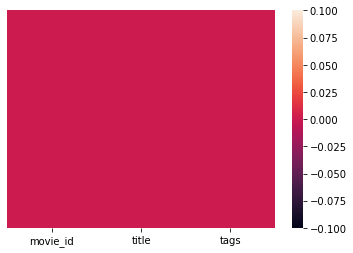

In [44]:
sns.heatmap(datasetf.isnull(),yticklabels=False)

In [45]:
# converting the list into string

In [46]:
datasetf['tags'].apply(lambda x:" ".join(x))

0       In the 22nd century, a paraplegic Marine is di...
1       Captain Barbossa, long believed to be dead, ha...
2       A cryptic message from Bond’s past sends him o...
3       Following the death of District Attorney Harve...
4       John Carter is a war-weary, former military ca...
                              ...                        
4804    El Mariachi just wants to play his guitar and ...
4805    A newlywed couple's honeymoon is upended by th...
4806    "Signed, Sealed, Delivered" introduces a dedic...
4807    When ambitious New York attorney Sam is sent t...
4808    Ever since the second grade when he first saw ...
Name: tags, Length: 4806, dtype: object

In [47]:
datasetf['tags'] = datasetf['tags'].apply(lambda x:" ".join(x))

C:\Users\syedf\AppData\Local\Temp\ipykernel_18052\2984679328.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datasetf['tags'] = datasetf['tags'].apply(lambda x:" ".join(x))


In [48]:
datasetf['tags'][0]

'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization. Action Adventure Fantasy ScienceFiction cultureclash future spacewar spacecolony society spacetravel futuristic romance space alien tribe alienplanet cgi marine soldier battle loveaffair antiwar powerrelations mindandsoul 3d SamWorthington ZoeSaldana SigourneyWeaver JamesCameron'

In [49]:
datasetf['tags'].apply(lambda x:x.lower())

0       in the 22nd century, a paraplegic marine is di...
1       captain barbossa, long believed to be dead, ha...
2       a cryptic message from bond’s past sends him o...
3       following the death of district attorney harve...
4       john carter is a war-weary, former military ca...
                              ...                        
4804    el mariachi just wants to play his guitar and ...
4805    a newlywed couple's honeymoon is upended by th...
4806    "signed, sealed, delivered" introduces a dedic...
4807    when ambitious new york attorney sam is sent t...
4808    ever since the second grade when he first saw ...
Name: tags, Length: 4806, dtype: object

In [50]:
datasetf['tags'] = datasetf['tags'].apply(lambda x:x.lower())

C:\Users\syedf\AppData\Local\Temp\ipykernel_18052\1412992317.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datasetf['tags'] = datasetf['tags'].apply(lambda x:x.lower())


In [51]:
datasetf.head()

,movie_id,title,tags
0,19995,Avatar,"in the 22nd century, a paraplegic marine is di..."
1,285,Pirates of the Caribbean: At World's End,"captain barbossa, long believed to be dead, ha..."
2,206647,Spectre,a cryptic message from bond’s past sends him o...
3,49026,The Dark Knight Rises,following the death of district attorney harve...
4,49529,John Carter,"john carter is a war-weary, former military ca..."


In [52]:
cv = CountVectorizer(max_features=5000,stop_words='english')

In [53]:
cv.fit_transform(datasetf['tags']).toarray()

# we convert it to a numpy array as the object(i.e. cv) which the CountVectorizer returns in in the form of parse matrix 

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [54]:
vectors = cv.fit_transform(datasetf['tags']).toarray()

In [55]:
cv.get_feature_names()

C:\Users\syedf\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['000',
 '007',
 '10',
 '100',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '18th',
 '19',
 '1930s',
 '1940s',
 '1944',
 '1950',
 '1950s',
 '1960s',
 '1970s',
 '1971',
 '1974',
 '1976',
 '1980',
 '1980s',
 '1985',
 '1990s',
 '1999',
 '19th',
 '19thcentury',
 '20',
 '200',
 '2003',
 '2009',
 '20th',
 '24',
 '25',
 '30',
 '300',
 '3d',
 '40',
 '50',
 '500',
 '60',
 '60s',
 '70',
 'aaron',
 'aaroneckhart',
 'abandoned',
 'abducted',
 'abigailbreslin',
 'abilities',
 'ability',
 'able',
 'aboard',
 'abuse',
 'abusive',
 'academic',
 'academy',
 'accept',
 'accepted',
 'accepts',
 'access',
 'accident',
 'accidental',
 'accidentally',
 'accompanied',
 'accomplish',
 'account',
 'accountant',
 'accused',
 'ace',
 'achieve',
 'act',
 'acting',
 'action',
 'actionhero',
 'actions',
 'activist',
 'activities',
 'activity',
 'actor',
 'actors',
 'actress',
 'acts',
 'actual',
 'actually',
 'adam',
 'adams',
 'adamsandler',
 'adamshankman',
 'adaptation',
 'adapted',
 'addict',
 'addi

In [56]:
# one problem is that we get same two words in a lil different way like:
# action, actions. # love, loving, loved
# so we gotta apply stemming which will convert [love, loved, loving] into [love, love, love]

In [57]:
import nltk

In [58]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [59]:
def stem(text):
    L2 = []
    for i in text.split():
        get = ps.stem(i)
        L2.append(get)
        
    return " ".join(L2)

In [60]:
stem('In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization. Action Adventure Fantasy ScienceFiction cultureclash future spacewar spacecolony society spacetravel futuristic romance space alien tribe alienplanet cgi marine soldier battle loveaffair antiwar powerrelations mindandsoul 3d SamWorthington ZoeSaldana SigourneyWeaver JamesCameron')

'in the 22nd century, a parapleg marin is dispatch to the moon pandora on a uniqu mission, but becom torn between follow order and protect an alien civilization. action adventur fantasi sciencefict cultureclash futur spacewar spacecoloni societi spacetravel futurist romanc space alien tribe alienplanet cgi marin soldier battl loveaffair antiwar powerrel mindandsoul 3d samworthington zoesaldana sigourneyweav jamescameron'

In [61]:
datasetf['tags'].apply(stem)

0       in the 22nd century, a parapleg marin is dispa...
1       captain barbossa, long believ to be dead, ha c...
2       a cryptic messag from bond’ past send him on a...
3       follow the death of district attorney harvey d...
4       john carter is a war-weary, former militari ca...
                              ...                        
4804    el mariachi just want to play hi guitar and ca...
4805    a newlyw couple' honeymoon is upend by the arr...
4806    "signed, sealed, delivered" introduc a dedic q...
4807    when ambiti new york attorney sam is sent to s...
4808    ever sinc the second grade when he first saw h...
Name: tags, Length: 4806, dtype: object

In [62]:
datasetf['tags'] = datasetf['tags'].apply(stem)

C:\Users\syedf\AppData\Local\Temp\ipykernel_18052\3138560498.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datasetf['tags'] = datasetf['tags'].apply(stem)


In [63]:
vectors.shape

(4806, 5000)

In [64]:
# now each of the 4806 movies is a vector in a 5000d space
# to predict the top 5 similar movies, we gotta calculateb the 5 nearest vectors

In [65]:
# we will calculate the cosine distance, that is cos theta.
# we won't use eucledian distance as it fails in case of high dimensional data| 

In [66]:
cosine_similarity(vectors)

array([[1.        , 0.08964215, 0.06071767, ..., 0.02519763, 0.0277885 ,
        0.        ],
       [0.08964215, 1.        , 0.06350006, ..., 0.02635231, 0.        ,
        0.        ],
       [0.06071767, 0.06350006, 1.        , ..., 0.02677398, 0.        ,
        0.        ],
       ...,
       [0.02519763, 0.02635231, 0.02677398, ..., 1.        , 0.07352146,
        0.04774099],
       [0.0277885 , 0.        , 0.        , ..., 0.07352146, 1.        ,
        0.05264981],
       [0.        , 0.        , 0.        , ..., 0.04774099, 0.05264981,
        1.        ]])

In [67]:
cosine_similarity(vectors).shape

(4806, 4806)

In [68]:
similarity_matrix = cosine_similarity(vectors)

In [69]:
# similarity of first movie with all other movies, with the first value being it only

In [70]:
similarity_matrix[0]

array([1.        , 0.08964215, 0.06071767, ..., 0.02519763, 0.0277885 ,
       0.        ])

In [71]:
# how to get a movie index from our dataset:

datasetf[datasetf['title'] == 'The Dark Knight Rises'].index[0]

3

In [72]:
# now get the movies that are most similar, that is similarity_matrix value shoud be 1 or close to 1
# movies most similarn to movie 1

sorted(similarity_matrix[0], reverse=True)

[1.0,
 0.26089696604360174,
 0.2581988897471611,
 0.25110592822973776,
 0.24944382578492943,
 0.24846467329894412,
 0.24397501823713333,
 0.243599382882345,
 0.24147264420814754,
 0.23904572186687872,
 0.22677868380553634,
 0.2238868314198225,
 0.22230800575069137,
 0.22190115272469205,
 0.22131333406899523,
 0.2173253797873328,
 0.21653278478430665,
 0.2164218276749025,
 0.2162249910469341,
 0.2162249910469341,
 0.2138089935299395,
 0.2125118592516207,
 0.21251185925162067,
 0.21251185925162067,
 0.2114722130550724,
 0.21147221305507238,
 0.2059714602177749,
 0.20498001542269692,
 0.20283702113484398,
 0.2,
 0.1980534816610477,
 0.19518001458970666,
 0.19518001458970666,
 0.19518001458970663,
 0.19518001458970663,
 0.19477964490741226,
 0.19451950503185494,
 0.1938916835823703,
 0.1938916835823703,
 0.19320245583349133,
 0.19194297398747862,
 0.1916629694999819,
 0.18869127060994534,
 0.18832944617230335,
 0.18752289237539818,
 0.18752289237539815,
 0.18708286933869708,
 0.18442777839

In [73]:
# but this disrupts the indexing of the movies. so we we will only get the most similar movies but we won't know the indexing
# so we need to maintain the indexing and at the same time get the most similar movies
# this can be done by using enumerate function. and we need to convert it into a list

In [74]:
# we will get the most similar movies to the first movie along with their indexes

sorted(list(enumerate(similarity_matrix[0])),reverse=True, key = lambda x: x[1])

[(0, 1.0),
 (539, 0.26089696604360174),
 (1194, 0.2581988897471611),
 (260, 0.25110592822973776),
 (1216, 0.24944382578492943),
 (507, 0.24846467329894412),
 (1444, 0.24397501823713333),
 (1920, 0.243599382882345),
 (582, 0.24147264420814754),
 (3730, 0.23904572186687872),
 (74, 0.22677868380553634),
 (3608, 0.2238868314198225),
 (322, 0.22230800575069137),
 (83, 0.22190115272469205),
 (4192, 0.22131333406899523),
 (2333, 0.2173253797873328),
 (1204, 0.21653278478430665),
 (47, 0.2164218276749025),
 (61, 0.2162249910469341),
 (495, 0.2162249910469341),
 (2409, 0.2138089935299395),
 (1537, 0.2125118592516207),
 (942, 0.21251185925162067),
 (972, 0.21251185925162067),
 (466, 0.2114722130550724),
 (1329, 0.21147221305507238),
 (2204, 0.2059714602177749),
 (151, 0.20498001542269692),
 (1201, 0.20283702113484398),
 (973, 0.2),
 (4048, 0.1980534816610477),
 (3162, 0.19518001458970666),
 (4405, 0.19518001458970666),
 (1275, 0.19518001458970663),
 (2786, 0.19518001458970663),
 (2971, 0.1947796

In [75]:
def recommend(movie):
    movie_index = datasetf[datasetf['title'] == movie].index[0]
    distances = similarity_matrix[movie_index] # this gives the cosine similarity of the given movie with all other movies
    movies_list = sorted(list(enumerate(distances)),reverse=True, key = lambda x: x[1])[1:6]
    
    for i in movies_list:
        print(datasetf.iloc[i[0]].title) 

In [76]:
recommend('The Dark Knight Rises')

The Dark Knight
Batman Begins
Batman
Batman Returns
Batman


In [77]:
# now we gotta fetch the names instead of the indexes

In [78]:
datasetf.iloc[65].title

'The Dark Knight'

In [79]:
recommend('Finding Nemo')

The Rugrats Movie
Dwegons
Dinosaur
Peeples
Bolt


In [80]:
recommend('The Pursuit of Happyness')

Boiler Room
Dutch Kills
Flash of Genius
The Wolf of Wall Street
Wall Street


In [86]:
pickle.dump(datasetf.to_dict(),open('movie_dicts.pkl','wb'))

In [89]:
pickle.dump(similarity_matrix,open('similarity.pkl','wb'))